Data import and aggregation

In [3]:
import sys
sys.version

'3.6.1 (v3.6.1:69c0db5050, Mar 21 2017, 01:21:04) \n[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]'

In [4]:
import pandas as pd
import numpy as np
import pickle

path1 = '/Users/arianiherrera/Desktop/NYCDataScience/InstaPredict_Capstone/image_posts_df.csv'
path2 = '/Users/arianiherrera/Desktop/NYCDataScience/InstaPredict_Capstone/image_posts_df2_new.pickle'

insta_combined_df1 = pd.read_csv(path1)
insta_combined_df2 = pickle.load(open(path2, 'rb'))
user_data = pd.read_csv('/Users/arianiherrera/Downloads/users.csv')

print(insta_combined_df1.shape, insta_combined_df2.shape, user_data.shape)

ModuleNotFoundError: No module named 'pandas'

In [3]:
input_data = insta_combined_df1.append(insta_combined_df2)

input_data = input_data.loc[input_data['tag'] == 'nature']
input_data['user'] = input_data['user'].apply(lambda x: x[1:])
final_df = pd.merge(input_data, user_data, how='inner', left_on = 'user', right_on = 'user')

In [32]:
input_data.to_csv('/Users/arianiherrera/Desktop/NYCDataScience/InstaPredict_Capstone/full_image_posts_df.csv')

In [4]:
final_df.shape

(46264, 68)

In [5]:
final_df.head()

,B_max,B_mean,B_median,B_rms,B_stddev,B_sum,B_sum2,B_var,G_max,G_mean,...,bio,full_name,list_likes,max_likes,mean_likes,median_likes,min_likes,scrape_time_y,top_N_dic,top_N_photos
0,255,98.992234,82,113.167626,54.840215,40547219.0,5.245711e+09,3007.449185,255,98.119165,...,– Xbox/ Cars/ Food/ Tattoos\nNetflix/ Beer/ No...,Danny.L,"[22, 13, 25, 127, 62, 120, 108, 3, 92, 2, 4, 3...",127,46.85,36.0,1,2017-03-23 14:41:07.260180,{'image': [u'https://scontent.cdninstagram.com...,"{'comments': [0, 0, 2, 5, 4, 1, 2, 0, 1, 0, 0,..."
1,255,98.992234,82,113.167626,54.840215,40547219.0,5.245711e+09,3007.449185,255,98.119165,...,– Xbox/ Cars/ Food/ Tattoos\nNetflix/ Beer/ No...,Danny.L,"[26, 19, 30, 19, 27, 127, 62, 121, 109, 3, 94,...",127,43.70,28.5,1,2017-03-23 20:28:20.863070,NaN,"{'comments': [1, 1, 0, 0, 2, 5, 4, 1, 2, 0, 1,..."
2,255,98.992234,82,113.167626,54.840215,40547219.0,5.245711e+09,3007.449185,255,98.119165,...,– Xbox/ Cars/ Food/ Tattoos\nNetflix/ Beer/ No...,Danny.L,"[5, 10, 17, 9, 24, 32, 32, 43, 71, 37, 108, 42...",113,46.20,34.5,5,2017-03-26 17:18:35.720349,NaN,{'image': ['https://scontent.cdninstagram.com/...
3,255,175.072593,177,176.990635,25.986001,53670254.0,9.603202e+09,675.272262,255,183.188837,...,– Xbox/ Cars/ Food/ Tattoos\nNetflix/ Beer/ No...,Danny.L,"[22, 13, 25, 127, 62, 120, 108, 3, 92, 2, 4, 3...",127,46.85,36.0,1,2017-03-23 14:41:07.260180,{'image': [u'https://scontent.cdninstagram.com...,"{'comments': [0, 0, 2, 5, 4, 1, 2, 0, 1, 0, 0,..."
4,255,175.072593,177,176.990635,25.986001,53670254.0,9.603202e+09,675.272262,255,183.188837,...,– Xbox/ Cars/ Food/ Tattoos\nNetflix/ Beer/ No...,Danny.L,"[26, 19, 30, 19, 27, 127, 62, 121, 109, 3, 94,...",127,43.70,28.5,1,2017-03-23 20:28:20.863070,NaN,"{'comments': [1, 1, 0, 0, 2, 5, 4, 1, 2, 0, 1,..."


In [6]:
# need to edit engineering file
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob
le = LabelEncoder()
final_df['filters'] = le.fit_transform(final_df['filters'])

In [7]:
final_df['num_hashtags'] = final_df.hashtags.apply(lambda x: len(x))
final_df['hashtags'] = final_df.hashtags.apply(lambda x: ''.join(x))
final_df['hashtag_polarity'] = final_df.hashtags.apply(lambda x: TextBlob(x).sentiment.polarity)
final_df['hashtag_subjectivity'] = final_df.hashtags.apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [8]:
feats_to_drop = ['Unnamed: 0_x', 'X1', 'caption', 'image', 'key', 'new_id', 'photo_id',
                  'scrape_time', 'index', 'image_key', 'post_time', 'time', 'likes','Unnamed: 0',
                 'bio', 'full_name', 'list_likes', 'top_N_dic', 'top_N_photos', 'hashtags', 'tag',
                 'scrape_time_x','user', 'Unnamed: 0_y','scrape_time_y', 'Unnamed: 0.1', 'caption_hashtags'
                 ]
from sklearn.cross_validation import train_test_split
X = final_df.drop(feats_to_drop, axis=1)
y = final_df[['likes']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
X.to_csv('/Users/arianiherrera/Desktop/NYCDataScience/InstaPredict_Capstone/final_df_features.csv')
y.to_csv('/Users/arianiherrera/Desktop/NYCDataScience/InstaPredict_Capstone/final_df_target.csv')


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((37011, 43), (9253, 43), (37011, 1), (9253, 1))


In [17]:
X_train.drop(['caption_hashtags'], axis=1, inplace=True)
X_test.drop(['caption_hashtags'], axis=1, inplace=True)

X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

/Users/arianiherrera/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/arianiherrera/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/arianiherrera/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((37011, 43), (9253, 43), (37011, 1), (9253, 1))


In [37]:
X_train.drop(['shoutouts'], axis=1, inplace=True)
X_test.drop(['shoutouts'], axis=1, inplace=True)

/Users/arianiherrera/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/arianiherrera/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [30]:
X_train.ix[:,30:].head()

,num_faces,percieved_luminance,shoutouts,Followers,Following,Posts,max_likes,mean_likes,median_likes,min_likes,num_hashtags,hashtag_polarity,hashtag_subjectivity
7477,0,1.642673e+10,0,217.0,273.0,804.0,31,12.85,14.0,1,369,0.500000,1.000000
18942,0,1.329852e+10,0,1433.0,494.0,152.0,258,153.95,144.0,84,285,0.250000,1.000000
39133,0,8.335040e+09,0,42250.0,457.0,1416.0,122,83.45,83.0,45,307,0.000000,0.000000
6930,0,4.188345e+09,0,485.0,274.0,239.0,150,113.75,129.0,42,371,0.371429,0.633333
31643,0,1.635901e+10,0,2715.0,244.0,384.0,258,169.30,164.5,116,296,0.000000,0.000000


In [99]:
list(X_train)

['B_max',
 'B_mean',
 'B_median',
 'B_rms',
 'B_stddev',
 'B_sum',
 'B_sum2',
 'B_var',
 'G_max',
 'G_mean',
 'G_median',
 'G_rms',
 'G_stddev',
 'G_sum',
 'G_sum2',
 'G_var',
 'R_max',
 'R_mean',
 'R_median',
 'R_rms',
 'R_stddev',
 'R_sum',
 'R_sum2',
 'R_var',
 'blur',
 'filters',
 'image_height',
 'image_width',
 'luminance',
 'num_faces',
 'percieved_luminance',
 'Followers',
 'Following',
 'Posts',
 'max_likes',
 'mean_likes',
 'median_likes',
 'min_likes',
 'num_hashtags',
 'hashtag_polarity',
 'hashtag_subjectivity']

In [88]:
X_train.drop(['comments'], axis=1, inplace=True)
X_test.drop(['comments'], axis=1, inplace=True)

/Users/arianiherrera/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/arianiherrera/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import median_absolute_error
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler

In [89]:
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 5,
          'learning_rate': 0.005, 'loss': 'lad', 'subsample': 0.6,
          'max_features': 'log2'
         }
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mape = median_absolute_error(y_test, clf.predict(X_test))
print("MAPE: %.4f" % mape)

seed = 0
np.random.seed(seed)

kfold = KFold(n=X_train.shape[0], n_folds=8, shuffle = True, random_state = seed)
results = cross_val_score(clf, X_train.as_matrix(), y_train.as_matrix(), cv=kfold)
print("Standardized Results: %.2f (%.2f) MAPE" % (results.mean(), results.std()))

/Users/arianiherrera/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAPE: 10.6802


/Users/arianiherrera/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/arianiherrera/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/arianiherrera/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/arianiherrera/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array w

Standardized Results: 0.35 (0.18) MAPE


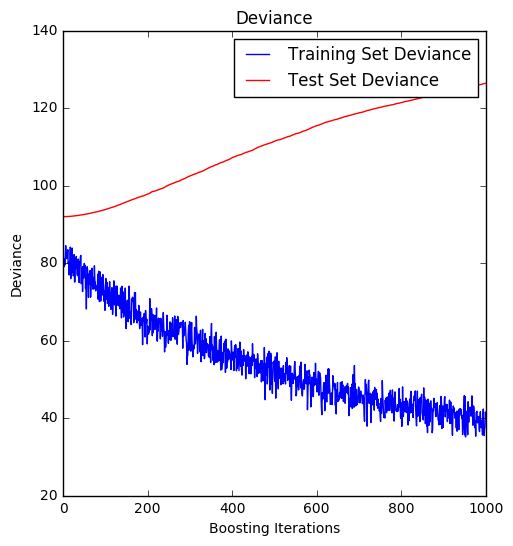

In [43]:
# compute test set deviance
%matplotlib inline
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test.as_matrix(), y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

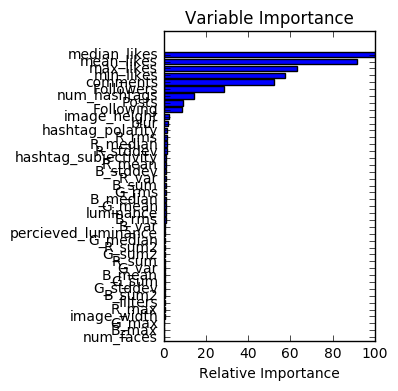

In [44]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [90]:
compare = pd.DataFrame({'base_truth': y_test.as_matrix().tolist() , 'prediction': clf.predict(X_test)})

In [91]:
compare['base_truth'] = compare.base_truth.apply(lambda x: x[0])

compare.head(10)

,base_truth,prediction
0,7.0,18.485843
1,13.0,14.215015
2,107.0,122.922792
3,22.0,27.164103
4,35.0,27.668313
5,87.0,112.071586
6,84.0,52.852527
7,41.0,39.310224
8,34.0,38.334061
9,84.0,72.283321


In [92]:
compare['difference'] = compare['prediction'] - compare['base_truth']
compare.head()

,base_truth,prediction,difference
0,7.0,18.485843,11.485843
1,13.0,14.215015,1.215015
2,107.0,122.922792,15.922792
3,22.0,27.164103,5.164103
4,35.0,27.668313,-7.331687


In [93]:
compare['difference'].quantile(0.95)

31.993532763605099

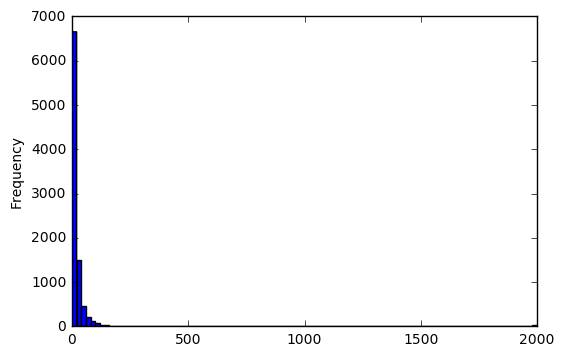

In [94]:
compare['difference'] = compare.difference.apply(lambda x: abs(x))
compare_cap = compare.difference.apply(lambda x: min(x,2000))
compare_cap.plot.hist(by='difference',bins=100)


In [95]:
import pickle
model_file = '/Users/arianiherrera/Desktop/NYCDataScience/InstaPredict_Capstone/Instapredict/gbr_model.sav'
pickle.dump(clf, open(model_file, 'wb'))

In [98]:
X_train[['num_hashtags','hashtag_polarity','hashtag_subjectivity','filters']].median()

num_hashtags            257.000000
hashtag_polarity          0.000000
hashtag_subjectivity      0.266667
filters                  27.000000
dtype: float64